# Stroke Exploratory Analysis

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

In this project, we'll be exploring a dataset available on [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) containing the information on strokes. This dataset will be used to predict whether a patient is likely to have a stroke based on various input parameters.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer

from sklearn.tree import DecisionTreeRegressor

## 1. Loading Dataset
___

In [2]:
df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")
print(f"> There are {df.shape[0]} rows and {df.shape[1]} columns.")
df.head()

> There are 5110 rows and 12 columns.


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Attribute Information**:

- **id**: unique identifier;
- **gender**: gender (Male, Female or Other);
- **age**: age of the person;
- **hypertension**: person has hypertension (1 or 0);
- **heart_disease**: person has any heart disease (1 or 0);
- **ever_married**: person has been married (1 or 0);
- **work_type**: nature of work place (children, Govt_jov, Never_worked, Private or Self-employed);
- **Residence_type**: Residence type of the individual (Rural or Urban);
- **avg_glucose_level**: average glucose level in blood for the individual;
- **bmi**: body mass index of the individual;
- **smoking_status**: current smoking status (formerly smoked, never smoked, smokes or Unknown);
- **stroke**: person suffered heart attack (1 or 0).

## 2. Data Cleaning
___

### Missing data

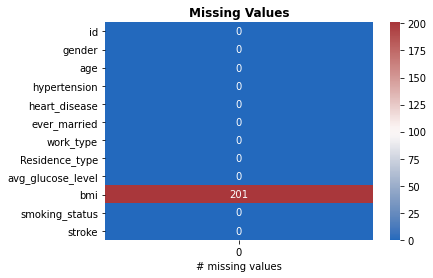

In [3]:
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d', cmap='vlag')
plt.title('Missing Values', fontweight='bold')
ax.set_xlabel('# missing values')
plt.show()

There are `201` missing values in the `bmi` column.

There are many ways we could deal with missing data (drop, fill values with mean/median, knn imputer).

In this case we'll be using **Decision Tree Regressor** to predict the missing values.

VERIFICAR OUTRA FORMA

CRIAR UM PIPELINE USANDO KNNIMPUTER

In [4]:
DT_bmi_pipe = Pipeline(steps=[ 
                              ('Scaler',StandardScaler()),
                              ('Regressor',DecisionTreeRegressor(random_state=42))
                             ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
y = X.pop('bmi')
DT_bmi_pipe.fit(X,y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [5]:
r2_score(DT_bmi_pipe.predict(X), y)

-1.6810473508658434

In [12]:
print(f"> Missing values after data cleaning: {sum(df.isna().sum())}")

> Missing values after data cleaning: 0


## 3. Data Exploration
___